<a href="https://colab.research.google.com/github/sarakamdod10/Linear-Regression-in-ML/blob/main/ConvolutionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
def plot_samples(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

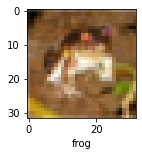

In [ ]:
plot_samples(X_train, y_train, 0)

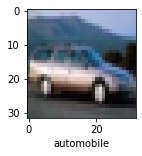

In [ ]:
plot_samples(X_train, y_train, 4)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5430 - accuracy: 0.4371
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1743 - accuracy: 0.5820
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0312 - accuracy: 0.6366
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9400 - accuracy: 0.6697
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8693 - accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8071 - accuracy: 0.7150
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7590 - accuracy: 0.7331
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7153 - accuracy: 0.7488
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6764 - accuracy: 0.7610
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.8760 - accuracy: 0.7117


[0.8759604692459106, 0.7117000222206116]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([[  0.6290915 ,  -6.5439863 ,   0.48738876,   5.253396  ,
         -0.3632443 ,   3.2579782 ,   0.523849  ,  -1.2308906 ,
          0.5889342 ,  -2.9119558 ],
       [  4.993855  ,   7.9004927 ,  -1.4485962 ,  -4.9062915 ,
         -4.327844  ,  -7.8288627 ,  -9.716697  ,  -7.4483004 ,
          7.7313633 ,   4.0008903 ],
       [  0.92904496,  -0.6604528 ,  -0.8309759 ,  -0.88821805,
         -1.0067594 ,  -1.8534697 ,  -2.959977  ,  -1.4059981 ,
          2.4857557 ,   1.3448873 ],
       [  4.356782  ,  -1.8367037 ,   1.5616993 ,  -1.461154  ,
         -1.0218138 ,  -4.3141913 ,  -4.4992867 ,  -4.758453  ,
          2.9951036 ,  -1.085226  ],
       [ -9.104657  ,  -4.8063326 ,   1.9226563 ,   0.9597449 ,
          5.2821484 ,  -3.1721907 ,   7.7814975 ,  -8.898354  ,
         -6.849312  , -10.373704  ]], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
y_classes = [np.argmax(element for element in y_pred)]

In [ ]:
y_classes[:5]

[0]

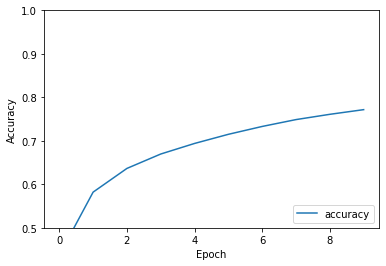

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')